<img src="https://dezyre.gumlet.io/images/blog/churn-models/Customer_Churn_Prediction_Models_in_Machine_Learning.png?w=376&dpr=2.6" alt="Hotel Booking" 
style="display: block; margin: auto;">

# Project Overview:
This dataset contains information about bank customers and their churn status, which indicates whether they have exited the bank or not. It is suitable for exploring and analyzing factors influencing customer churn in banking institutions and for building predictive models to identify customers at risk of churning. 

### Column Explanations:

- CustomerId: Unique identifier for each customer.
- Surname: The surname of the customer.
- CreditScore: A numerical score representing the customer's creditworthiness.
- Geography: The geographical location of the customer.
- Gender: The gender of the customer.
- Age: The age of the customer.
- Tenure: The number of years the customer has been with the company.
- Balance: The account balance of the customer.
- NumOfProducts: The number of products the customer has with the company.
- HasCrCard: Indicator if the customer has a credit card (typically binary: 1 for yes, 0 for no).
- IsActiveMember: Indicator if the customer is an active member (typically binary: 1 for yes, 0 for no).
- EstimatedSalary: The estimated annual salary of the customer.
- Exited: Indicator if the customer has exited or churned (typically binary: 1 for yes, 0 for no).

## Import Libraries


In [8]:
# Data manipulation libraries
import pandas as pd  # For handling and manipulating data in DataFrame format
import numpy as np  # For numerical operations and array manipulations

# Visualization libraries
import matplotlib.pyplot as plt  # For creating static visualizations like plots and charts
import seaborn as sns  # For enhanced statistical data visualization
import plotly.express as px  # For interactive visualizations

# Data preparation and splitting
from sklearn.model_selection import train_test_split  # For splitting the dataset into training and testing sets
from sklearn.preprocessing import LabelEncoder  # For encoding categorical variables into numeric labels
from sklearn.preprocessing import StandardScaler  # For standardizing features by scaling them to a standard normal distribution

# Classification algorithms
from sklearn.tree import DecisionTreeClassifier  # For decision tree-based classification
from sklearn.neighbors import KNeighborsClassifier  # For k-nearest neighbors classification
from sklearn.ensemble import RandomForestClassifier  # For random forest ensemble-based classification
from xgboost import XGBClassifier  # For gradient boosting classification using XGBoost

# Model evaluation metrics
from sklearn.metrics import classification_report  # For generating precision, recall, and F1 score
from sklearn.metrics import confusion_matrix  # For creating a confusion matrix to evaluate classification
from sklearn.metrics import accuracy_score  # For computing the accuracy of the model
from sklearn.metrics import RocCurveDisplay  # For plotting the ROC curve of binary classification models
import warnings
warnings.filterwarnings("ignore")

## Load Data

In [11]:
df=pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
df.drop(columns=['RowNumber'],inplace=True) # drop not useful column

# EDA 📍

In [16]:
df.columns # names of columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [52]:
df.describe().T # describe numric columns 

,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
Exited,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


In [54]:
df.describe(include='O').T # describe category columns 

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [56]:
df.isna().sum() # Not null value

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Analysis & Visalizations📊

- the most  name and country have balance

In [20]:
df.groupby(['Surname','Geography',])['Balance'].max().nlargest(5)

Surname   Geography
Lo        Spain        250898.09
To Rot    France       238387.56
Haddon    Spain        222267.63
McIntosh  Spain        221532.80
Shaw      Spain        216109.88
Name: Balance, dtype: float64

In [22]:
df.groupby('NumOfProducts')['Balance'].max().nlargest(5) # num of product don't affect in balance

NumOfProducts
3    250898.09
1    238387.56
2    214346.96
4    195238.29
Name: Balance, dtype: float64

### Gender with other columns 

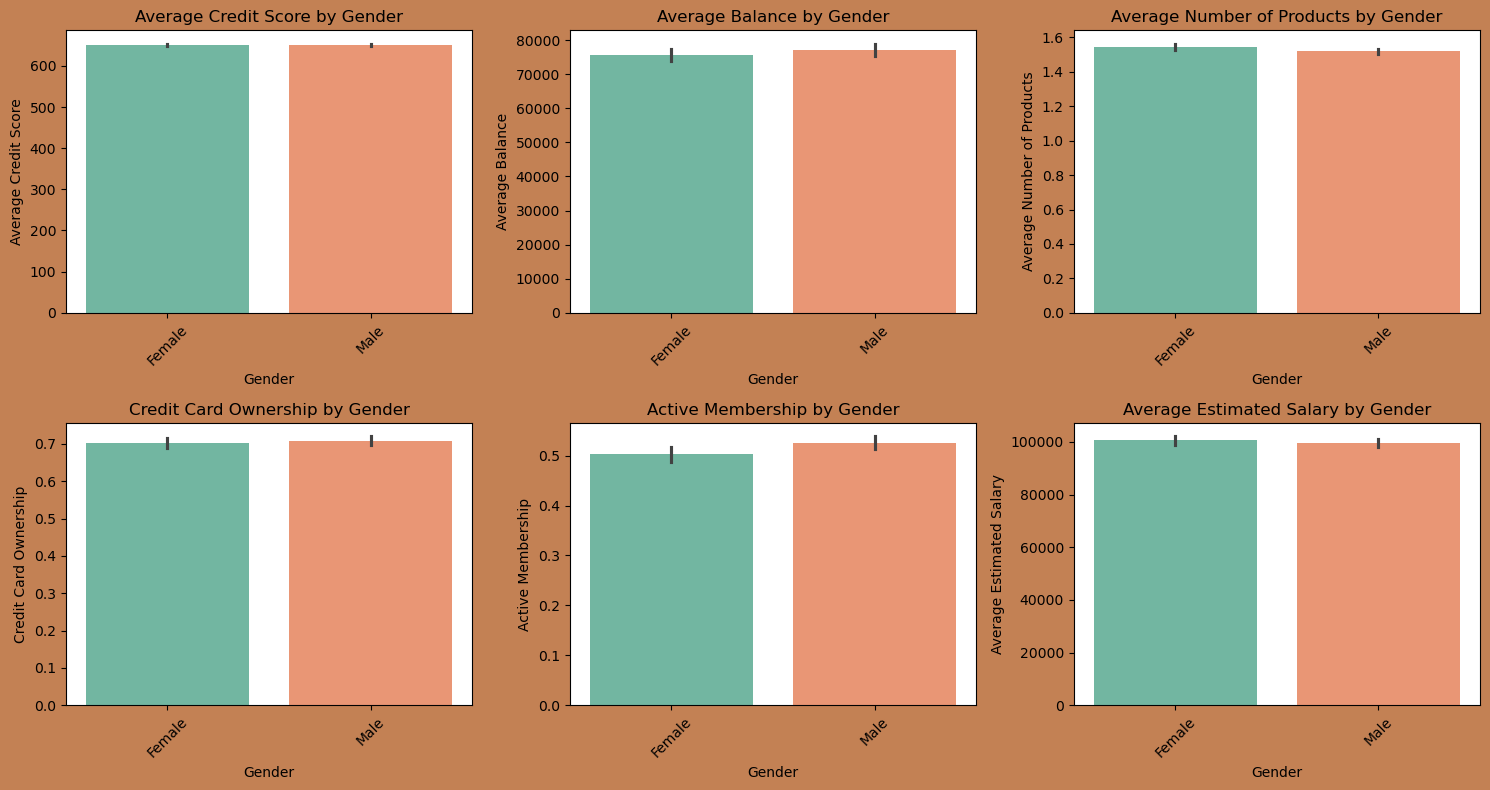

In [25]:
plt.figure(figsize=(15, 8), facecolor="#C38154")

features = ['CreditScore', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
titles = ['Average Credit Score by Gender', 'Average Balance by Gender', 
          'Average Number of Products by Gender', 'Credit Card Ownership by Gender', 
          'Active Membership by Gender', 'Average Estimated Salary by Gender']

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.barplot(x='Gender', y=feature, data=df, palette='Set2')
    plt.title(titles[i-1])
    plt.xlabel('Gender')
    plt.ylabel(titles[i-1].split(' by ')[0])
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [66]:
df.groupby('Geography')['NumOfProducts'].sum() # sum of product for each country 
# that is reason for heigh balance

Geography
France     7676
Germany    3813
Spain      3813
Name: NumOfProducts, dtype: int64

In [67]:
df.groupby('Geography')['Balance'].sum() # sum of balance for each country 

Geography
France     3.113325e+08
Germany    3.004029e+08
Spain      1.531236e+08
Name: Balance, dtype: float64

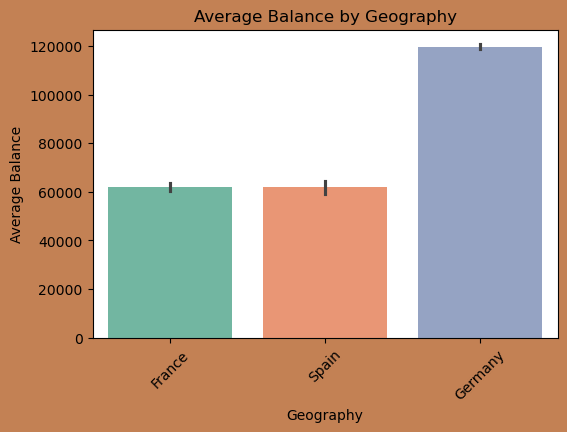

In [68]:
plt.figure(figsize=(6, 4), facecolor="#C38154")
sns.barplot(x='Geography', y='Balance', data=df, palette='Set2')
plt.title('Average Balance by Geography')
plt.xlabel('Geography')
plt.ylabel('Average Balance')
plt.xticks(rotation=45)
plt.show()

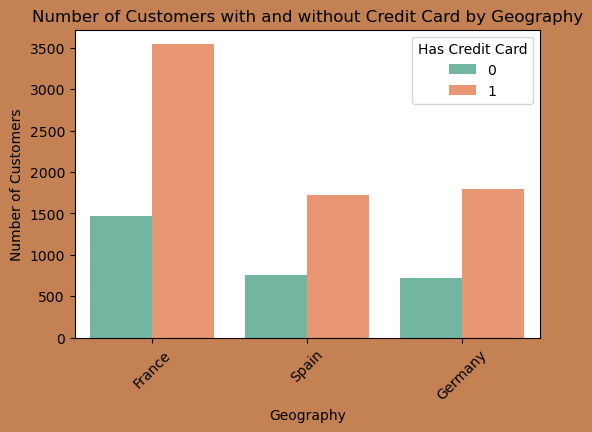

In [73]:
plt.figure(figsize=(6, 4), facecolor="#C38154")
sns.countplot(x='Geography', hue='HasCrCard', data=df, palette='Set2')
plt.title('Number of Customers with and without Credit Card by Geography')
plt.xlabel('Geography')
plt.ylabel('Number of Customers')
plt.legend(title='Has Credit Card')
plt.xticks(rotation=45)
plt.show()


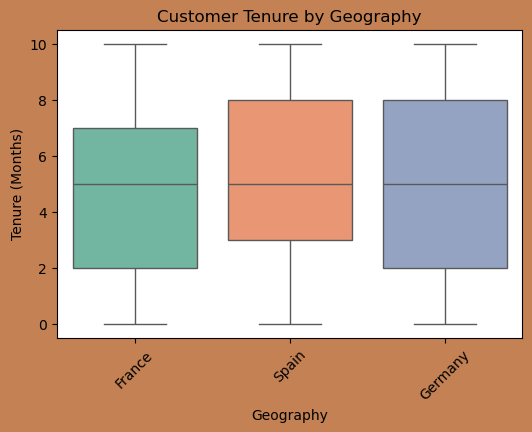

In [75]:
plt.figure(figsize=(6, 4), facecolor="#C38154")
sns.boxplot(x='Geography', y='Tenure', data=df, palette='Set2')
plt.title('Customer Tenure by Geography')
plt.xlabel('Geography')
plt.ylabel('Tenure (Months)')
plt.xticks(rotation=45)
plt.show()


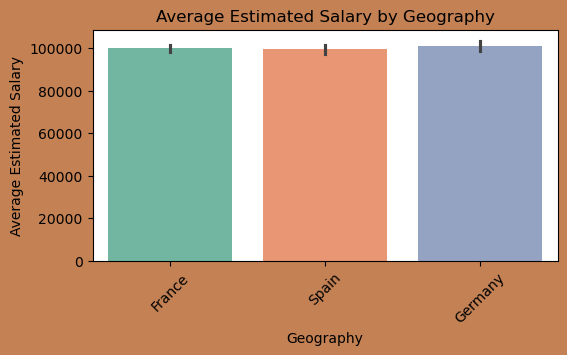

In [77]:
plt.figure(figsize=(6, 3), facecolor="#C38154")
sns.barplot(x='Geography', y='EstimatedSalary', data=df, palette='Set2')
plt.title('Average Estimated Salary by Geography')
plt.xlabel('Geography')
plt.ylabel('Average Estimated Salary')
plt.xticks(rotation=45)
plt.show()


### Relation between Age and [EstimatedSalary , Balance] 

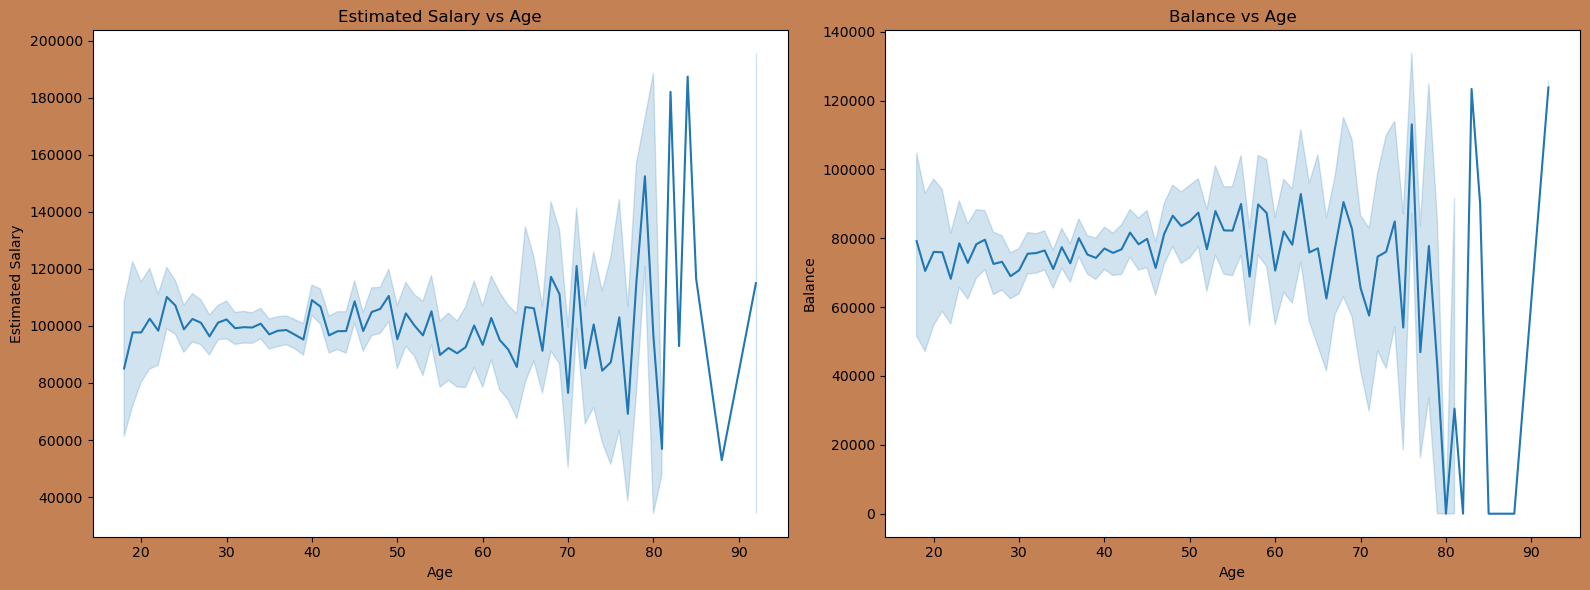

In [80]:
plt.figure(figsize=(16, 6), facecolor="#C38154")

# Estimated Salary vs Age
plt.subplot(1, 2, 1)
sns.lineplot(x='Age', y='EstimatedSalary', data=df, palette='Set2')
plt.title('Estimated Salary vs Age')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')

# Balance vs Age
plt.subplot(1, 2, 2)
sns.lineplot(x='Age', y='Balance', data=df, palette='Set2')
plt.title('Balance vs Age')
plt.xlabel('Age')
plt.ylabel('Balance')

plt.tight_layout()
plt.show()


In [81]:
def categorize_age(age):
    if 18 <= age <= 30:
        return '18-30'
    elif 31 <= age <= 45:
        return '31-45'
    elif 46 <= age <= 60:
        return '46-60'
    elif 61 <= age <= 92:
        return '61-92'
    else:
        return 'Unknown'
df['AgeGroup'] = df['Age'].apply(categorize_age)


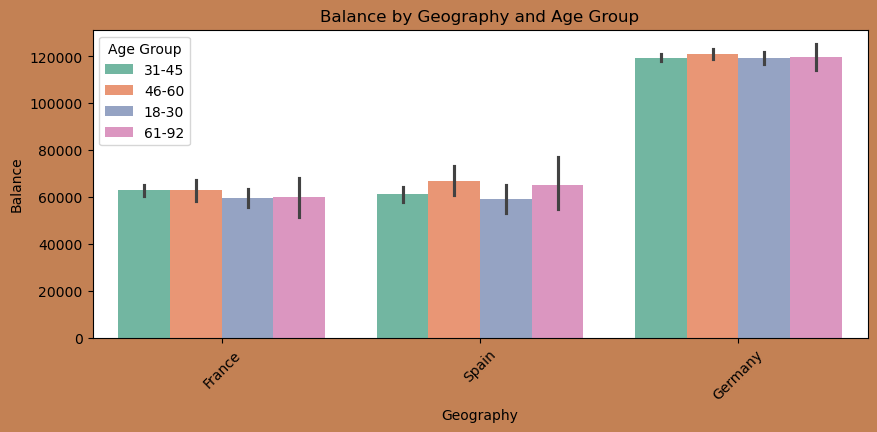

In [82]:
plt.figure(figsize=(10, 4), facecolor="#C38154")
sns.barplot(x='Geography', y='Balance', hue='AgeGroup', data=df, palette='Set2')
plt.title('Balance by Geography and Age Group')
plt.xlabel('Geography')
plt.ylabel('Balance')
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.show()


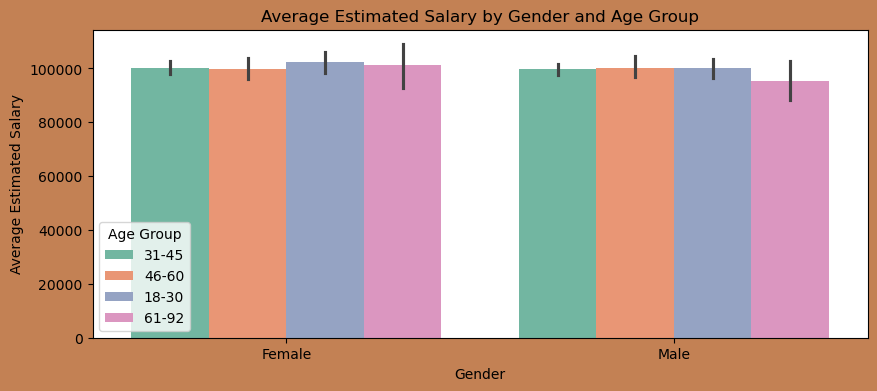

In [83]:
plt.figure(figsize=(10, 4), facecolor="#C38154")
sns.barplot(x='Gender', y='EstimatedSalary', hue='AgeGroup', data=df, palette='Set2')
plt.title('Average Estimated Salary by Gender and Age Group')
plt.xlabel('Gender')
plt.ylabel('Average Estimated Salary')
plt.legend(title='Age Group')
plt.show()


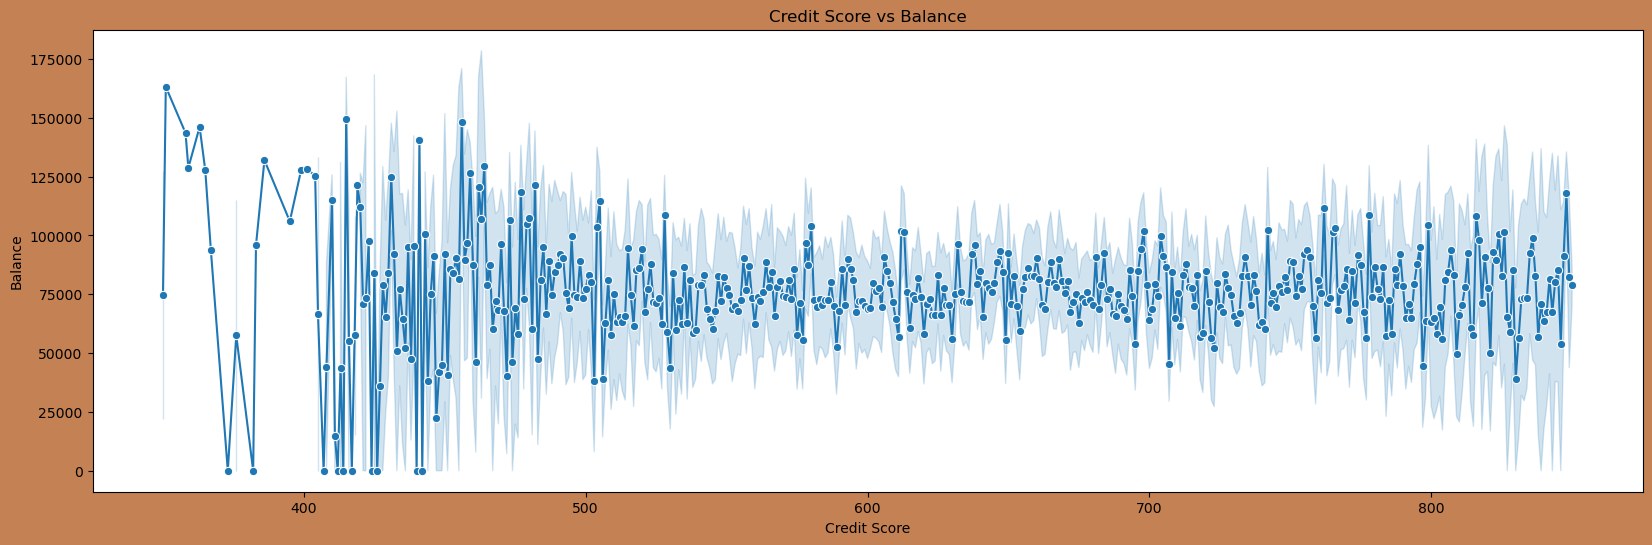

In [84]:
plt.figure(figsize=(20, 6), facecolor="#C38154")
df_sorted = df.sort_values('CreditScore')
sns.lineplot(x='CreditScore', y='Balance', data=df_sorted, palette='Set2', marker='o')
plt.title('Credit Score vs Balance')
plt.xlabel('Credit Score')
plt.ylabel('Balance')
plt.show()


## Target with Categorical Columns

In [90]:
target = 'Exited'

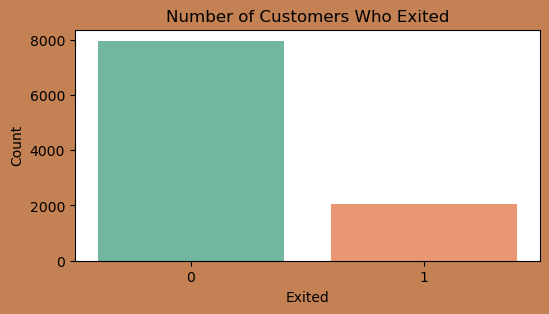

In [91]:
plt.figure(figsize=(6, 3), facecolor="#C38154")
sns.countplot(x='Exited', data=df, palette='Set2')
plt.title('Number of Customers Who Exited')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

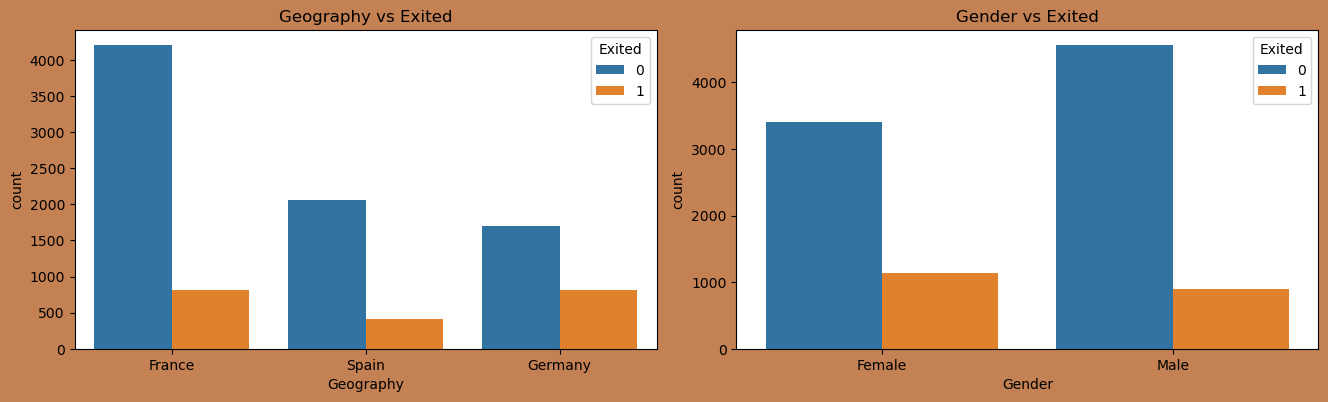

In [92]:
categorical_columns =['Geography','Gender']
plt.figure(figsize=(20, 15),facecolor="#C38154")
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 3, i)
    top_10_values = df[col].value_counts().nlargest(10).index
    sns.countplot(x=col, hue=target, data=df[df[col].isin(top_10_values)])
    plt.title(f'{col} vs {target}')
    plt.legend(title=target)
plt.tight_layout()
plt.show()

## Target with Numerical Columns

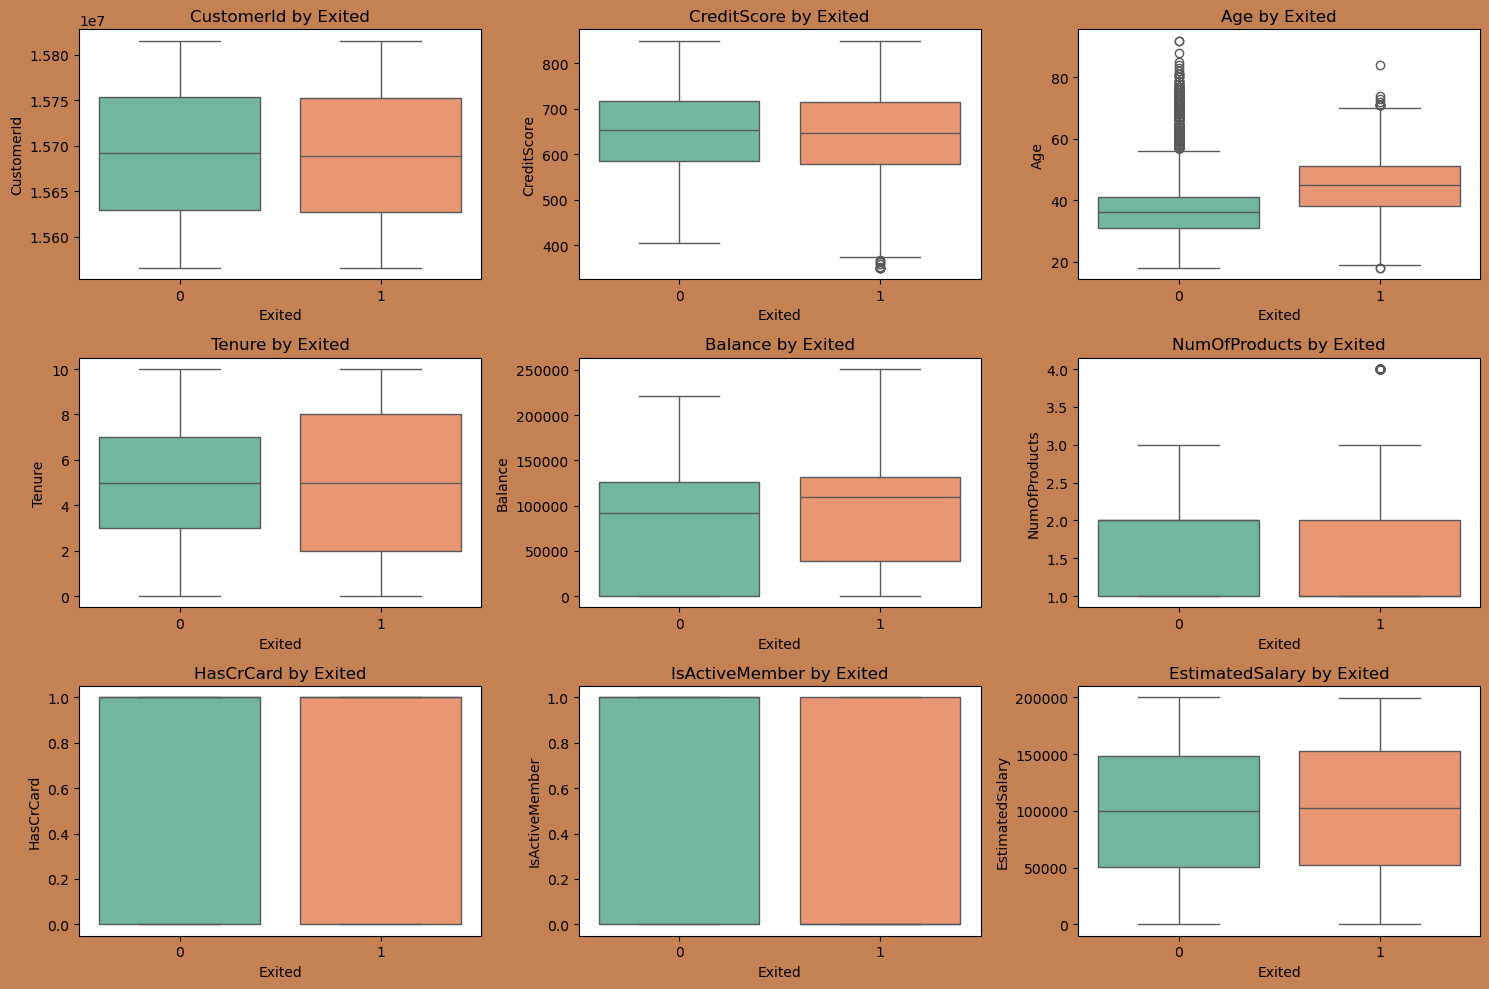

In [98]:
plt.figure(figsize=(15, 10),facecolor="#C38154")

numerical_columns = df.select_dtypes(include=['int64', 'float64']).drop(columns='Exited').columns

num_columns = len(numerical_columns)
n_rows = (num_columns + 2) // 3  

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(n_rows, 3, i)
    sns.boxplot(x='Exited', y=column, data=df, palette='Set2')
    plt.title(f'{column} by Exited')
    plt.xlabel('Exited')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


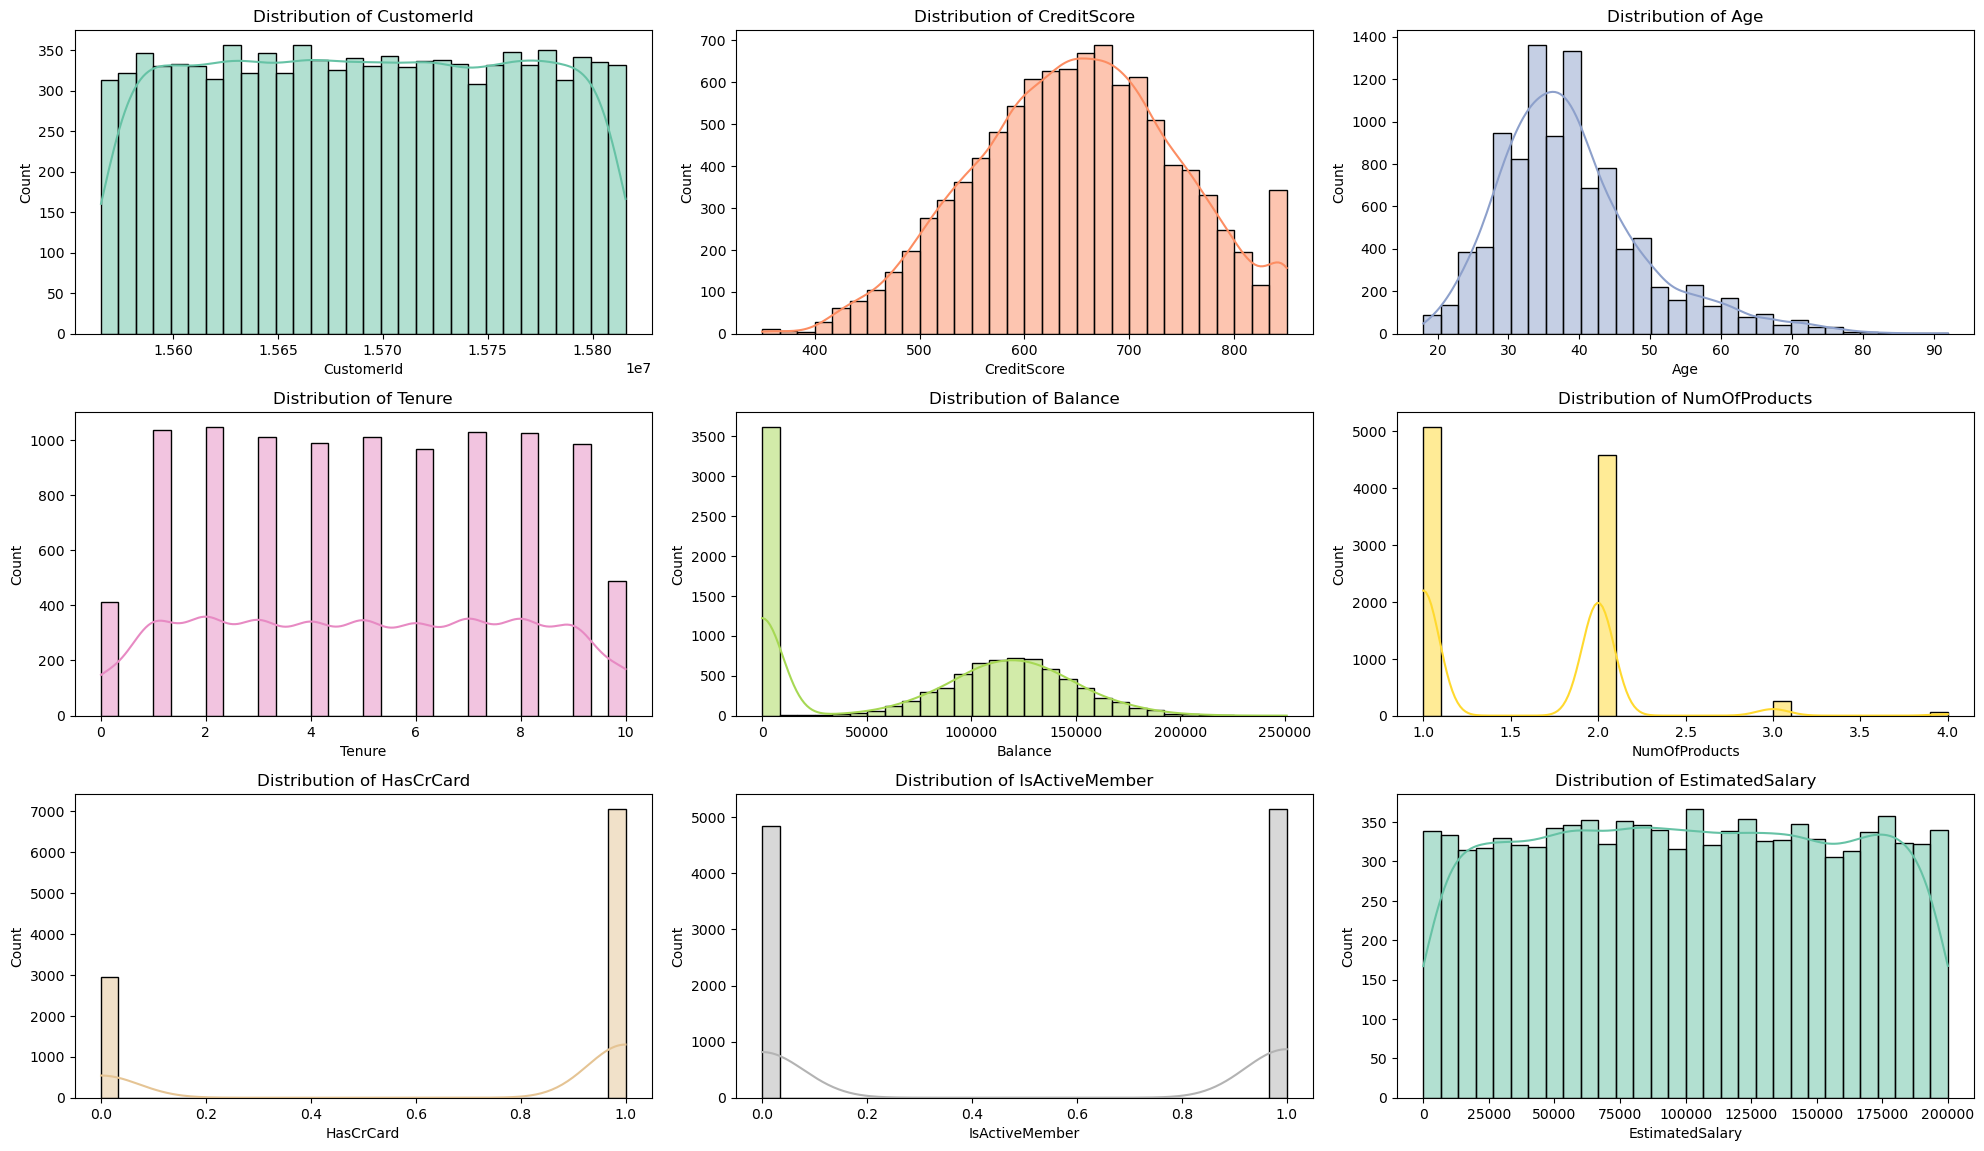

In [104]:
plt.figure(figsize=(20, 15))
colors = sns.color_palette('Set2', n_colors=len(numerical_columns))  

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color=colors[i-1])   # edit color for all 
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


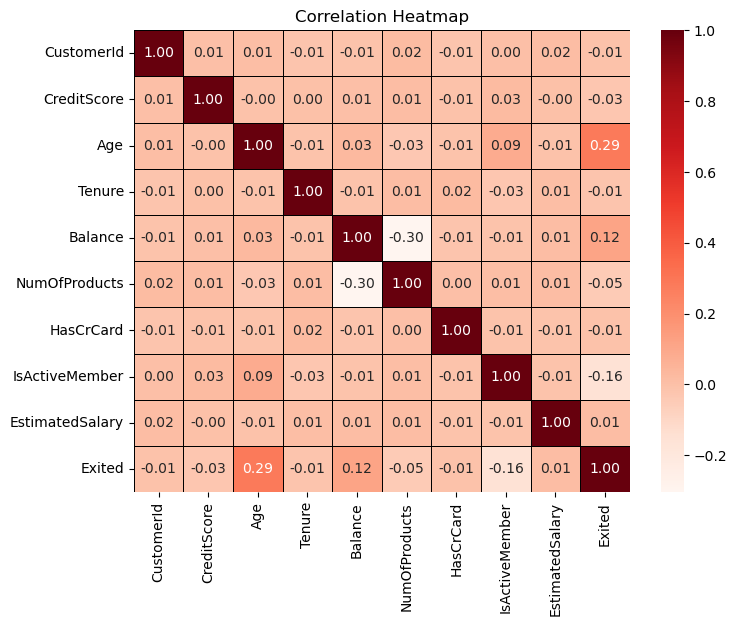

In [106]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
corr_matrix = numeric_df.corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True,cmap='Reds', linecolor='black',fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# Predictive Modeling

## Data Preparation


- Label Encoder

In [111]:
le = LabelEncoder()
columns_to_encode = ['Geography', 'Gender']
for column in columns_to_encode:
    df[column] = le.fit_transform(df[column])


- Train Test Split 

In [114]:
from sklearn.model_selection import train_test_split
x = df[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
y = df['Exited']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


## 1. K-Nearest Neighbors (KNN)


In [117]:
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

# Predictions
y_train_pred_knn = knn_model.predict(x_train)
y_test_pred_knn = knn_model.predict(x_test)

# Calculate accuracy
accuracy_train_knn = accuracy_score(y_train, y_train_pred_knn)
accuracy_test_knn = accuracy_score(y_test, y_test_pred_knn)

# Print accuracy
print("KNN - Training Accuracy:", accuracy_train_knn)
print("KNN - Testing Accuracy:", accuracy_test_knn)

# Print the classification report
print("KNN - Training Classification Report:")
print(classification_report(y_train, y_train_pred_knn))
print("KNN - Testing Classification Report:")
print(classification_report(y_test, y_test_pred_knn))


KNN - Training Accuracy: 0.8155
KNN - Testing Accuracy: 0.764
KNN - Training Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      6356
           1       0.65      0.23      0.33      1644

    accuracy                           0.82      8000
   macro avg       0.74      0.60      0.61      8000
weighted avg       0.79      0.82      0.78      8000

KNN - Testing Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.93      0.86      1607
           1       0.24      0.09      0.14       393

    accuracy                           0.76      2000
   macro avg       0.52      0.51      0.50      2000
weighted avg       0.70      0.76      0.72      2000



## 2. Decision Tree


In [120]:
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)

# Predictions
y_train_pred_dt = dt_model.predict(x_train)
y_test_pred_dt = dt_model.predict(x_test)

# Calculate accuracy
accuracy_train_dt = accuracy_score(y_train, y_train_pred_dt)
accuracy_test_dt = accuracy_score(y_test, y_test_pred_dt)

# Print accuracy
print("Decision Tree - Training Accuracy:", accuracy_train_dt)
print("Decision Tree - Testing Accuracy:", accuracy_test_dt)

# Print the classification report
print("Decision Tree - Training Classification Report:")
print(classification_report(y_train, y_train_pred_dt))
print("Decision Tree - Testing Classification Report:")
print(classification_report(y_test, y_test_pred_dt))


Decision Tree - Training Accuracy: 1.0
Decision Tree - Testing Accuracy: 0.782
Decision Tree - Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6356
           1       1.00      1.00      1.00      1644

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

Decision Tree - Testing Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1607
           1       0.45      0.52      0.49       393

    accuracy                           0.78      2000
   macro avg       0.67      0.68      0.67      2000
weighted avg       0.80      0.78      0.79      2000



## 3. Random Forest


In [123]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

# Predictions
y_train_pred_rf = rf_model.predict(x_train)
y_test_pred_rf = rf_model.predict(x_test)

# Calculate accuracy
accuracy_train_rf = accuracy_score(y_train, y_train_pred_rf)
accuracy_test_rf = accuracy_score(y_test, y_test_pred_rf)

# Print accuracy
print("Random Forest - Training Accuracy:", accuracy_train_rf)

# Print the classification report
print("Random Forest - Training Classification Report:")
print(classification_report(y_train, y_train_pred_rf))
print("Random Forest - Testing Accuracy:", accuracy_test_rf)
print("Random Forest - Testing Classification Report:")
print(classification_report(y_test, y_test_pred_rf))


Random Forest - Training Accuracy: 1.0
Random Forest - Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6356
           1       1.00      1.00      1.00      1644

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

Random Forest - Testing Accuracy: 0.8645
Random Forest - Testing Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



## 4. XGBoost


In [126]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(x_train, y_train)

# Predictions
y_train_pred_xgb = xgb_model.predict(x_train)
y_test_pred_xgb = xgb_model.predict(x_test)

# Calculate accuracy
accuracy_train_xgb = accuracy_score(y_train, y_train_pred_xgb)
accuracy_test_xgb = accuracy_score(y_test, y_test_pred_xgb)
print("XGBoost - Training Accuracy:", accuracy_train_xgb)

# Print the classification report
print("XGBoost - Training Classification Report:")
print(classification_report(y_train, y_train_pred_xgb))
print("XGBoost - Testing Accuracy:", accuracy_test_xgb)
print("XGBoost - Testing Classification Report:")
print(classification_report(y_test, y_test_pred_xgb))


XGBoost - Training Accuracy: 0.955375
XGBoost - Training Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      6356
           1       0.97      0.81      0.88      1644

    accuracy                           0.96      8000
   macro avg       0.96      0.90      0.93      8000
weighted avg       0.96      0.96      0.95      8000

XGBoost - Testing Accuracy: 0.861
XGBoost - Testing Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.70      0.51      0.59       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000



- Finally : The accuracy is normal becauce the corrleation with Target is very weak .
